In [34]:
import requests
from requests.auth import HTTPBasicAuth
from urllib.parse import urlencode
import datetime as dt

import pandas as pd
import geopandas

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [53]:
# Run for local database
HOST = 'http://localhost'
auth = None

In [36]:
# Run for hosted database
HOST = 'https://esida.informatik.haw-hamburg.de'
auth = HTTPBasicAuth('esida', 'opendata22')

# Get Shapes from database

In [54]:
# Parameters:
# - type=region|district (optional)
# - wkt (optional, returns Geometry)
q = {
    #'type': 'region',
    'wkt': True
}
d = requests.get(f"{HOST}/api/v1/shapes?{urlencode(q)}", auth=auth).json()

# DataFrame
regions_gdf = geopandas.GeoDataFrame(d['data'])
if q['wkt']:
    regions_gdf['geometry'] = geopandas.GeoSeries.from_wkt(regions_gdf['wkt'])
    regions_gdf = regions_gdf.drop(columns=['wkt'])

In [55]:
regions = dict(zip(regions_gdf.id, regions_gdf.name))

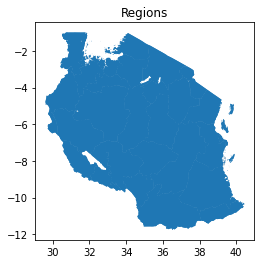

In [56]:
regions_gdf.plot()
plt.title('Regions')
plt.show()

# Load popc

In [57]:
parameter_id = 'worldpop_popc'
q = {
    'start_date': '2019', # optional
    'end_date': '2019' # optional
}
d = requests.get(f"{HOST}/api/v1/parameter/{parameter_id}?{urlencode(q)}", auth=auth).json()
popc_df = pd.DataFrame(d['data'])

In [58]:
# print available fields
print(d['fields'])

['worldpop_popc']


In [59]:
popc_df.head()

,shape_id,worldpop_popc,year
0,1,2550491.8,2019
1,2,2175324.5,2019
2,3,1955466.6,2019
3,4,2529980.8,2019
4,5,2776577.0,2019


# Load sexage

In [60]:
parameter_id = 'worldpop_sexage'
q = {
    'start_date': '2019', # optional
    'end_date': '2019' # optional
}
d = requests.get(f"{HOST}/api/v1/parameter/{parameter_id}?{urlencode(q)}", auth=auth).json()
sexage_df = pd.DataFrame(d['data'])

In [61]:
d

{'data': [{'shape_id': 1, 'worldpop_sexage': 2410445.2, 'year': 2019},
  {'shape_id': 2, 'worldpop_sexage': 2055879.4, 'year': 2019},
  {'shape_id': 3, 'worldpop_sexage': 1848094.2, 'year': 2019},
  {'shape_id': 4, 'worldpop_sexage': 2391063.8, 'year': 2019},
  {'shape_id': 5, 'worldpop_sexage': 2624116.5, 'year': 2019},
  {'shape_id': 6, 'worldpop_sexage': 1280814.1, 'year': 2019},
  {'shape_id': 7, 'worldpop_sexage': 6464527.5, 'year': 2019},
  {'shape_id': 8, 'worldpop_sexage': 911472.25, 'year': 2019},
  {'shape_id': 9, 'worldpop_sexage': 1371564.4, 'year': 2019},
  {'shape_id': 10, 'worldpop_sexage': 1598977.4, 'year': 2019},
  {'shape_id': 11, 'worldpop_sexage': 1027894.25, 'year': 2019},
  {'shape_id': 12, 'worldpop_sexage': 2030582.4, 'year': 2019},
  {'shape_id': 13, 'worldpop_sexage': 1618854.6, 'year': 2019},
  {'shape_id': 14, 'worldpop_sexage': 2832889.8, 'year': 2019},
  {'shape_id': 15, 'worldpop_sexage': 1260462.4, 'year': 2019},
  {'shape_id': 28, 'worldpop_sexage': 13

In [62]:
sexage_df.head()

,shape_id,worldpop_sexage,year
0,1,2410445.2,2019
1,2,2055879.4,2019
2,3,1848094.2,2019
3,4,2391063.8,2019
4,5,2624116.5,2019


# Merge

In [63]:
df = popc_df.merge(sexage_df[['worldpop_sexage', 'shape_id']], on='shape_id')

In [64]:
df['delta'] = df['worldpop_popc'] -  df['worldpop_sexage']
df['delta_pct'] =   df['worldpop_sexage'] / df['worldpop_popc']

In [65]:
regions_gdf['shape_id'] = regions_gdf['id']
df = df.merge(regions_gdf, on='shape_id')

In [66]:
df

,shape_id,worldpop_popc,year,worldpop_sexage,delta,delta_pct,area_sqm,id,name,type,geometry
0,1,2550491.80,2019,2410445.20,140046.60,0.945090,4.194073e+10,1,Dodoma,region,"MULTIPOLYGON (((36.31609 -5.52782, 36.31818 -5..."
1,2,2175324.50,2019,2055879.40,119445.10,0.945091,3.703191e+10,2,Arusha,region,"POLYGON ((35.83179 -3.42883, 35.83153 -3.42867..."
2,3,1955466.60,2019,1848094.20,107372.40,0.945091,1.318330e+10,3,Kilimanjaro,region,"POLYGON ((38.39026 -4.10047, 38.40446 -4.11112..."
3,4,2529980.80,2019,2391063.80,138917.00,0.945092,2.787135e+10,4,Tanga,region,"POLYGON ((37.76613 -5.01153, 37.76672 -5.01223..."
4,5,2776577.00,2019,2624116.50,152460.50,0.945090,7.016366e+10,5,Morogoro,region,"MULTIPOLYGON (((37.43550 -8.54236, 37.43420 -8..."
...,...,...,...,...,...,...,...,...,...,...,...
221,222,233093.56,2019,220294.60,12798.96,0.945091,1.047057e+08,222,Magharibi A,district,"POLYGON ((39.27725 -6.17416, 39.27696 -6.17398..."
222,223,118640.38,2019,112125.93,6514.45,0.945091,2.309093e+08,223,Micheweni,district,"POLYGON ((39.68494 -4.87277, 39.68504 -4.87295..."
223,224,112343.71,2019,106175.01,6168.70,0.945091,2.948198e+08,224,Wete,district,"MULTIPOLYGON (((39.68100 -5.13949, 39.68052 -5..."
224,225,111848.64,2019,105707.13,6141.51,0.945091,2.189550e+08,225,Chake Chake,district,"POLYGON ((39.77278 -5.16294, 39.77408 -5.16319..."


In [67]:
gdf = geopandas.GeoDataFrame(df)

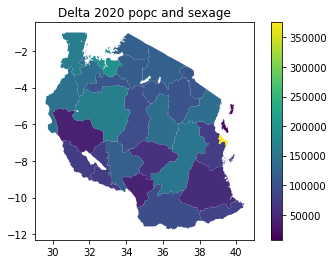

In [68]:
gdf[gdf['type'] == 'region'].plot(column='delta', legend=True)
plt.title('Delta 2020 popc and sexage')
plt.show()

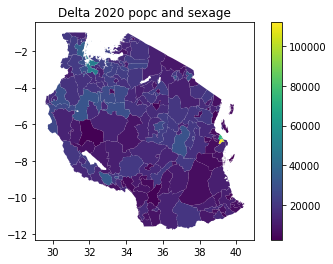

In [69]:
gdf[gdf['type'] == 'district'].plot(column='delta', legend=True)
plt.title('Delta 2020 popc and sexage')
plt.show()

In [70]:
gdf['delta_pct'] =   gdf['worldpop_sexage'] / gdf['worldpop_popc']

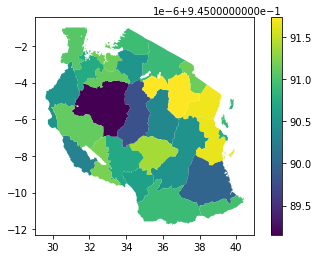

In [71]:
gdf[gdf['type'] == 'region'].plot(column='delta_pct', legend=True)
#plt.title('Delta 2020 popc and sexage')
plt.show()

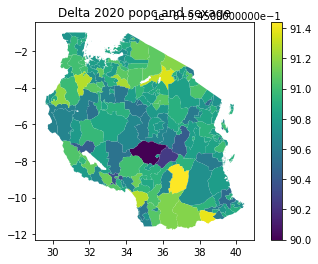

In [72]:
gdf[gdf['type'] == 'district'].plot(column='delta_pct', legend=True)
plt.title('Delta 2020 popc and sexage')
plt.show()

In [73]:
gdf

,shape_id,worldpop_popc,year,worldpop_sexage,delta,delta_pct,area_sqm,id,name,type,geometry
0,1,2550491.80,2019,2410445.20,140046.60,0.945090,4.194073e+10,1,Dodoma,region,"MULTIPOLYGON (((36.31609 -5.52782, 36.31818 -5..."
1,2,2175324.50,2019,2055879.40,119445.10,0.945091,3.703191e+10,2,Arusha,region,"POLYGON ((35.83179 -3.42883, 35.83153 -3.42867..."
2,3,1955466.60,2019,1848094.20,107372.40,0.945091,1.318330e+10,3,Kilimanjaro,region,"POLYGON ((38.39026 -4.10047, 38.40446 -4.11112..."
3,4,2529980.80,2019,2391063.80,138917.00,0.945092,2.787135e+10,4,Tanga,region,"POLYGON ((37.76613 -5.01153, 37.76672 -5.01223..."
4,5,2776577.00,2019,2624116.50,152460.50,0.945090,7.016366e+10,5,Morogoro,region,"MULTIPOLYGON (((37.43550 -8.54236, 37.43420 -8..."
...,...,...,...,...,...,...,...,...,...,...,...
221,222,233093.56,2019,220294.60,12798.96,0.945091,1.047057e+08,222,Magharibi A,district,"POLYGON ((39.27725 -6.17416, 39.27696 -6.17398..."
222,223,118640.38,2019,112125.93,6514.45,0.945091,2.309093e+08,223,Micheweni,district,"POLYGON ((39.68494 -4.87277, 39.68504 -4.87295..."
223,224,112343.71,2019,106175.01,6168.70,0.945091,2.948198e+08,224,Wete,district,"MULTIPOLYGON (((39.68100 -5.13949, 39.68052 -5..."
224,225,111848.64,2019,105707.13,6141.51,0.945091,2.189550e+08,225,Chake Chake,district,"POLYGON ((39.77278 -5.16294, 39.77408 -5.16319..."


In [74]:
gdf['delta_pct'].min()

0.9450891517626681

In [75]:
gdf['delta_pct'].max()

0.9450917381458485

In [76]:
gdf['delta_pct2'] = 1 - gdf['delta_pct']

In [77]:
gdf['delta_pct2'].mean()

0.05490916142676576

<AxesSubplot:xlabel='name'>

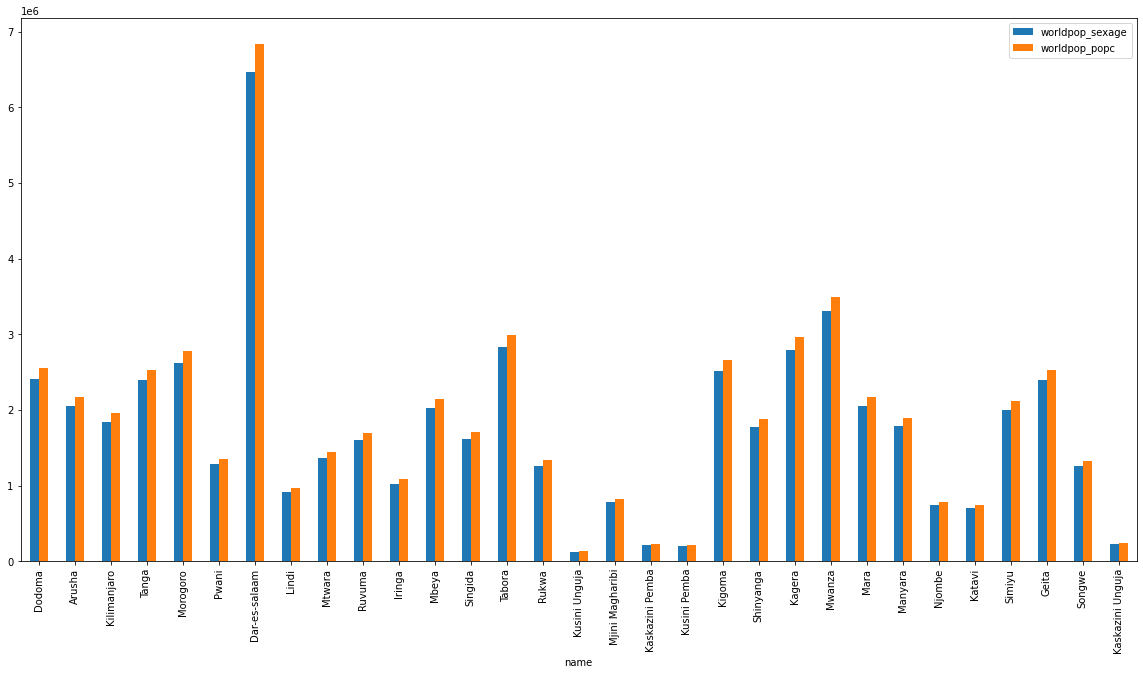

In [78]:
df[df['type'] == 'region'].plot.bar(x='name', y=['worldpop_sexage', 'worldpop_popc' ], figsize=(20, 10))

<AxesSubplot:xlabel='name'>

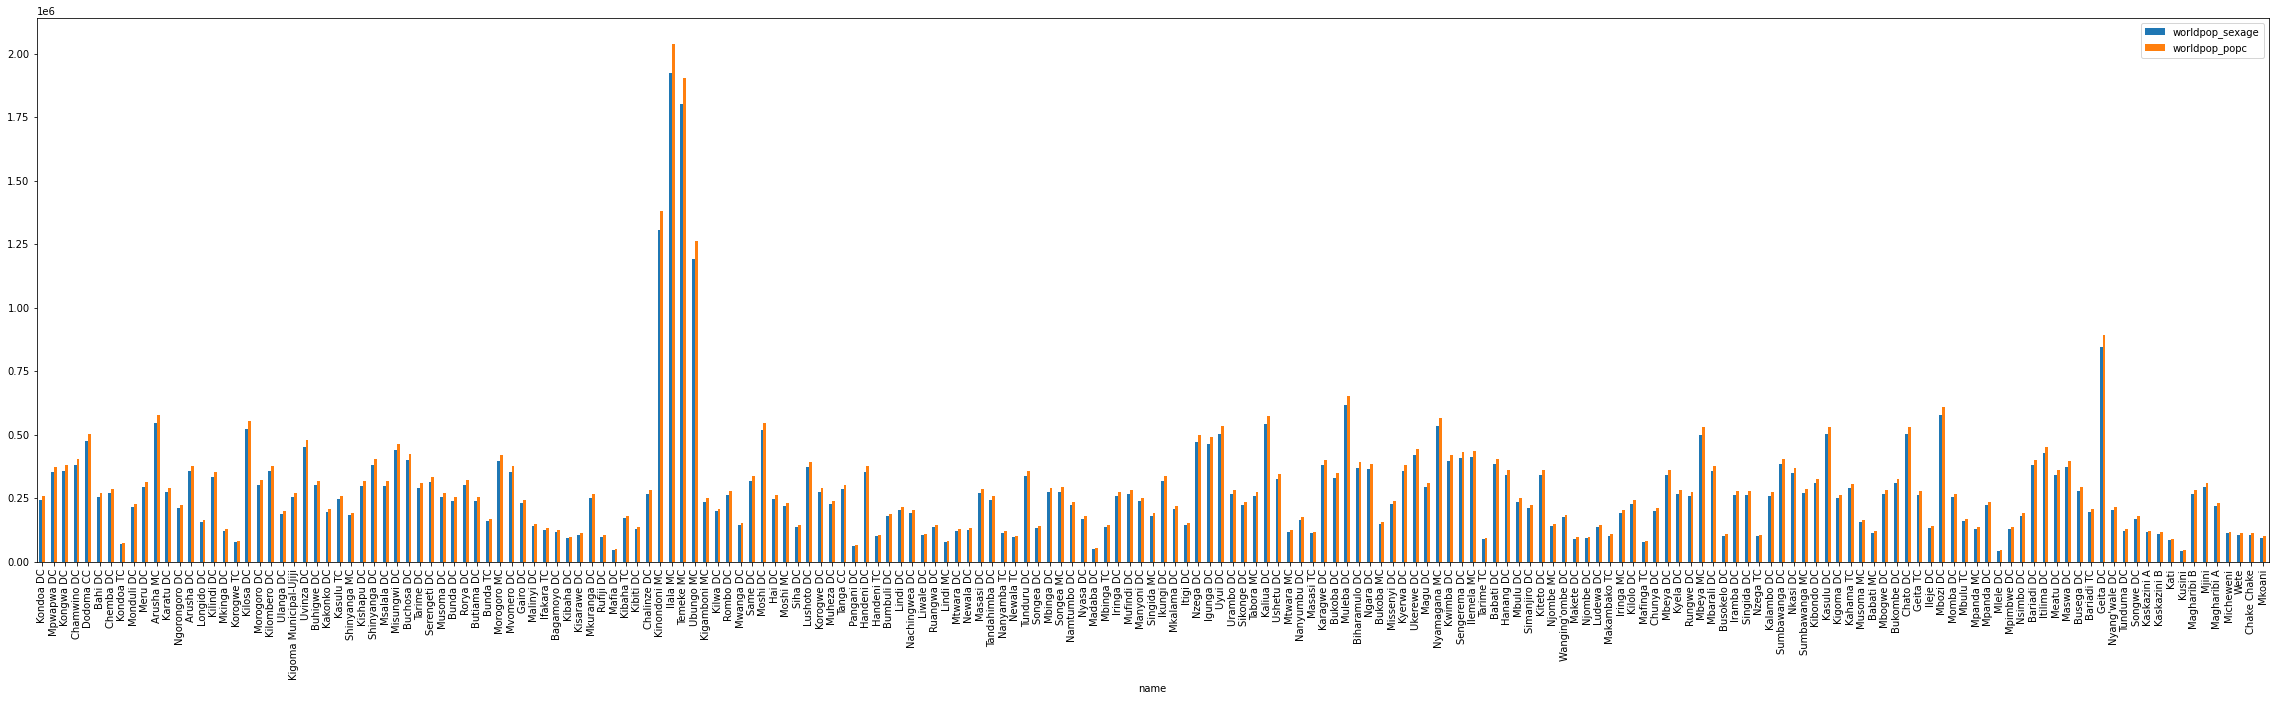

In [79]:
df[df['type'] == 'district'].plot.bar(x='name', y=['worldpop_sexage', 'worldpop_popc' ], figsize=(40, 10))

<AxesSubplot:xlabel='name'>

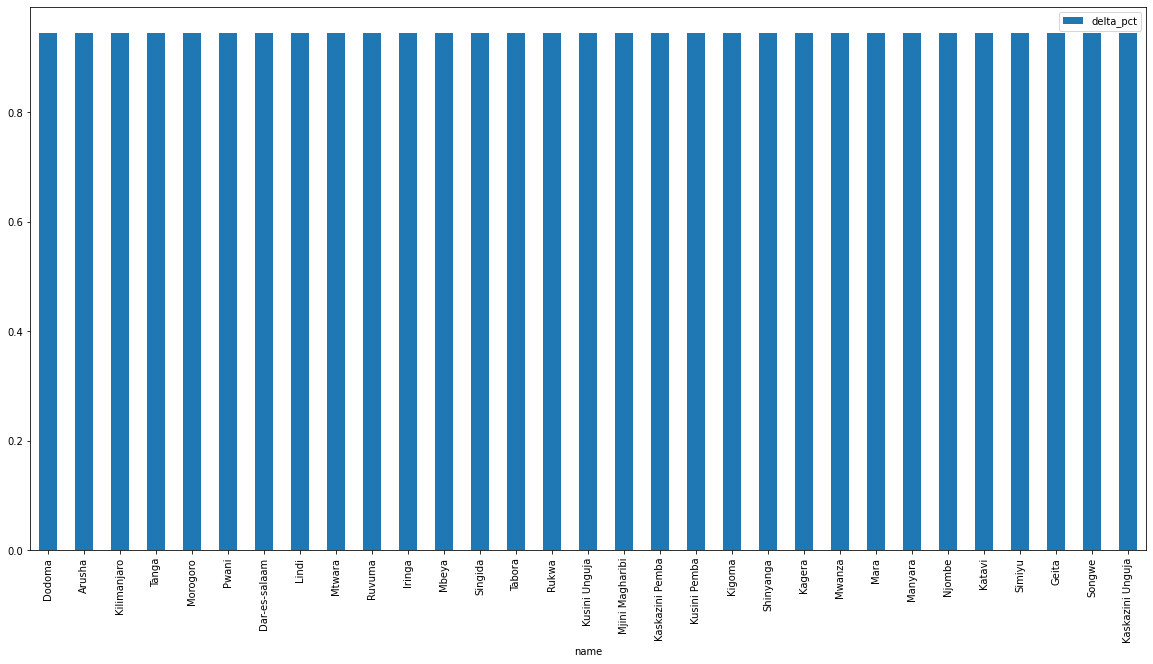

In [80]:
df[df['type'] == 'region'].plot.bar(x='name', y=['delta_pct' ], figsize=(20, 10))

<AxesSubplot:xlabel='name'>

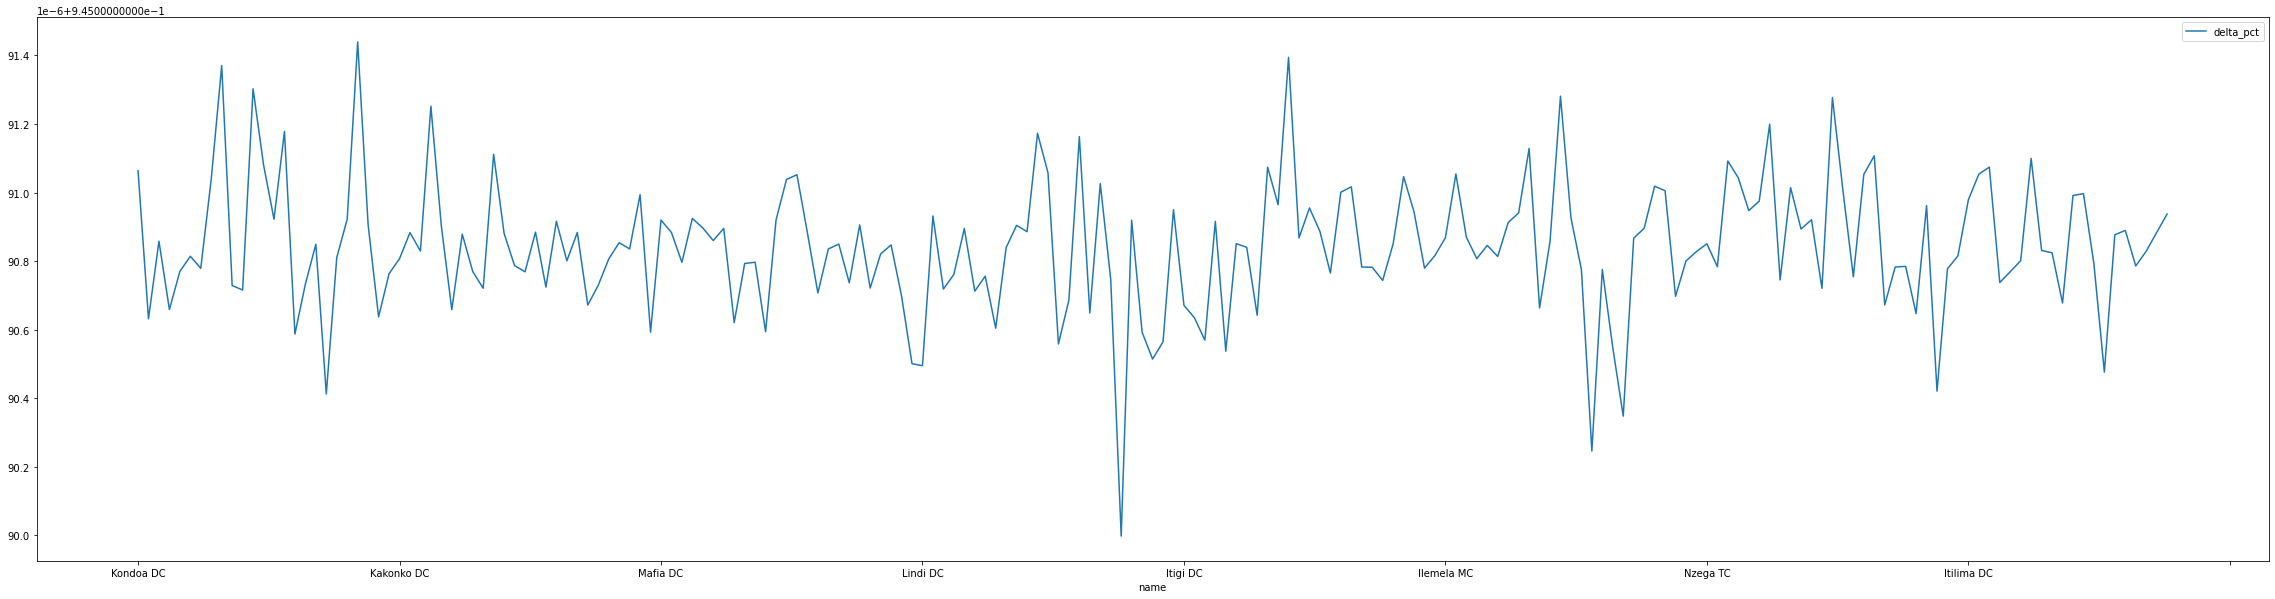

In [81]:
df[df['type'] == 'district'].plot.line(x='name', y=['delta_pct' ], figsize=(40, 10))